In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline 

In [2]:
#tickers

eth = pd.read_csv('eth.csv',parse_dates=True, index_col="date")
eth = eth['PriceUSD']

btc = pd.read_csv('btc.csv',parse_dates=True, index_col="date")
btc = btc['PriceUSD']




In [60]:
weights = [1]
ret_btc = np.log(btc/btc.shift(1))

retorno_btc = np.sum(ret_btc.mean() * 252)



ret_eth = np.log(eth/eth.shift(1))

retorno_eth = np.sum(ret_eth.mean() * 252)

#volatilidade dos ativos


volatilidade_btc  =  ret_btc.std() * np.sqrt(252) 
volatilidade_eth  =  ret_eth.std() * np.sqrt(252) 




In [61]:
#juntar todos os tickers
crypto = pd.concat([eth,btc],axis=1)
crypto.columns = ['eth','btc']

crypto

,eth,btc
date,,
2009-01-03,NaN,NaN
2009-01-04,NaN,NaN
2009-01-05,NaN,NaN
2009-01-06,NaN,NaN
2009-01-07,NaN,NaN
...,...,...
2020-01-30,184.256749,9508.920965
2020-01-31,180.163670,9357.284782
2020-02-01,183.562508,9381.886029


In [62]:
#retorno log
log_ret=np.log(crypto/crypto.shift(1))
log_ret

,eth,btc
date,,
2009-01-03,NaN,NaN
2009-01-04,NaN,NaN
2009-01-05,NaN,NaN
2009-01-06,NaN,NaN
2009-01-07,NaN,NaN
...,...,...
2020-01-30,0.053393,0.020932
2020-01-31,-0.022464,-0.016075
2020-02-01,0.018690,0.002626


In [63]:
num_ports = 500

all_weights = np.zeros((num_ports,len(crypto.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights(o numero precisa de ser igual ao numero de ativos)
    weights = np.array(np.random.random(2))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *365)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 365, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [64]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 365
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 365, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [65]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 

In [66]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) -1 

In [67]:
cons = ({'type':'eq','fun': check_sum})

In [68]:
bounds = ((0, 1), (0, 1))

In [69]:

init_guess = [0.25,0.25]

In [70]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [71]:
opt_results

     fun: -1.287877903927457
     jac: array([-4.33623791e-06,  2.14576721e-06])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.33257905, 0.66742095])

In [72]:
#aqui está a array com os pesos da carteira que devemos ter para maximizar o valor do sharpe ratio
opt_results.x

array([0.33257905, 0.66742095])

In [73]:
#a partir desta parte, é codigo para trabalhar a parte ilustrativa de forma a melhor visulizar os resultados 
get_ret_vol_sr(opt_results.x)

array([1.18438915, 0.91964397, 1.2878779 ])

In [ ]:
x = get_ret_vol_sr(opt_results.x)[0]

y = get_ret_vol_sr(opt_results.x)[1]


In [75]:
frontier_y= np.linspace(0,0.3,100)

In [76]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [ ]:

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result = minimize(minimize_vol,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])


Compra 33.257905479352054 % de Ethereum
Compra 66.74209452064795 % de Bitcoin


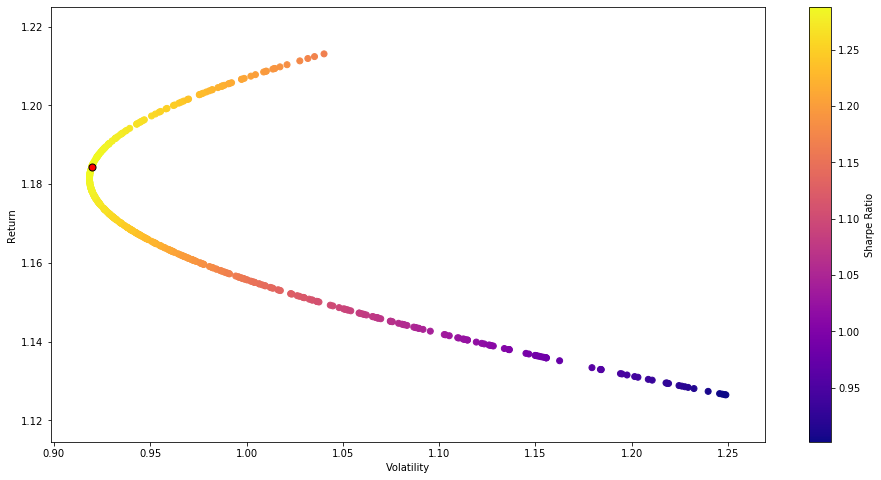

In [91]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(y,x,c='red',s=50,edgecolors='black')

print('Compra', opt_results.x[0] * 100,'% de Ethereum')
print('Compra', opt_results.x[1] * 100,'% de Bitcoin')




SyntaxError: invalid syntax (<ipython-input-89-481276fe937a>, line 1)